In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=24, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=10, size=5, width=3)
rc('ytick.major', pad=10, size=5, width=3)

In [2]:
#df = pd.read_csv(r'./All_data.dat' , delimiter='  ', skip_blank_lines=True)
df = pd.read_csv(r'./../06_data/20220124_all_data.dat', delimiter='  ', skip_blank_lines=True)

/home/debasish/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df = df.sort_values(by=['bondD'], ascending=False)
df = df.reset_index()  # make sure indexes pair with number of rows
data = []
matching_attributes = ["Lx","lambda","mu_y","theta"]
for index, row in df.iterrows():
    row_is_in_data=False
    for d in data:
        count = 0
        for key in matching_attributes:
            #print(key,d[key],row[key])
            if d[key]==row[key]:
                count +=1
            else:
                break
        
        #print(" ")
        if count == len(matching_attributes):
            row_is_in_data=True
            break
    
    if not row_is_in_data:
        data.append(row)

In [6]:
df2 = pd.DataFrame(data)
print(df2)

       index    Lx  lambda  mu_y  theta  bondD  Energy_GS    winding  \
0     1226.0  24.0    -1.0  1.87    0.0  125.0 -94.077282  18.023341   
1      866.0  20.0    -1.0  0.72    0.0  105.0 -53.920941  -5.217008   
2      834.0  20.0    -1.0  0.37    0.0  105.0 -51.382972  -8.034439   
3      705.0  20.0    -1.0  0.71    0.0  105.0 -53.820941  -5.217008   
4      709.0  20.0    -1.0  0.36    0.0  105.0 -51.342972  -8.034439   
...      ...   ...     ...   ...    ...    ...        ...        ...   
1329   259.0   4.0    -1.0  0.48    0.0   15.0 -10.796310  -1.094287   
1330   260.0   4.0    -1.0  0.50    0.0   15.0 -10.836310  -1.094287   
1331   261.0   4.0    -1.0  0.52    0.0   15.0 -10.876310  -1.094287   
1332   262.0   4.0    -1.0  0.54    0.0   15.0 -10.916310  -1.094287   
1333     0.0  10.0    -1.0  0.20    0.0   15.0 -25.738233  -5.113079   

             eA         eB        MA        MB        U4      Oflip    Oflipp  \
0      2.992214   2.992214  0.008010 -0.008010  0.8886

In [7]:
#df.sort_values(by=['Lx'])
lattsizes = df.Lx.to_numpy()
lattsizes = np.unique(lattsizes)
print(lattsizes)
#print(df.Lx)

[ 3  4  8 10 12 16 20 24]


In [8]:
tempMU  = np.array(df[(df['Lx']==3)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==3)]['winding']);
tempEN  = np.array(df[(df['Lx']==3)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==3)]['MA']);  tempMB  = np.array(df[(df['Lx']==3)]['MB']);
tempeA  = np.array(df[(df['Lx']==3)]['eA']);  tempeB  = np.array(df[(df['Lx']==3)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==3)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==3)]['Oflipp']);
indL3   = tempMU.argsort();
L3mu = tempMU[indL3]; L3Wind = tempWIN[indL3]; L3energy = tempEN[indL3];
L3MA = tempMA[indL3]; L3MB = tempMB[indL3]; L3eA = tempeA[indL3]; L3eB = tempeB[indL3];
L3Oflip = tempOf1[indL3]; L3Oflipp = tempOf2[indL3];
#
tempMU  = np.array(df[(df['Lx']==4)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==4)]['winding']);
tempEN  = np.array(df[(df['Lx']==4)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==4)]['MA']);  tempMB  = np.array(df[(df['Lx']==4)]['MB']);
tempeA  = np.array(df[(df['Lx']==4)]['eA']);  tempeB  = np.array(df[(df['Lx']==4)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==4)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==4)]['Oflipp']);
indL4   = tempMU.argsort();
L4mu = tempMU[indL4]; L4Wind = tempWIN[indL4]; L4energy = tempEN[indL4];
L4MA = tempMA[indL4]; L4MB = tempMB[indL4]; L4eA = tempeA[indL4]; L4eB = tempeB[indL4];
L4Oflip = tempOf1[indL4]; L4Oflipp = tempOf2[indL4];
#
tempMU  = np.array(df[(df['Lx']==8)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==8)]['winding']);
tempEN  = np.array(df[(df['Lx']==8)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==8)]['MA']);  tempMB  = np.array(df[(df['Lx']==8)]['MB']);
tempeA  = np.array(df[(df['Lx']==8)]['eA']);  tempeB  = np.array(df[(df['Lx']==8)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==8)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==8)]['Oflipp']);
indL8   = tempMU.argsort();
L8mu = tempMU[indL8]; L8Wind = tempWIN[indL8]; L8energy = tempEN[indL8];
L8MA = tempMA[indL8]; L8MB = tempMB[indL8]; L8eA = tempeA[indL8]; L8eB = tempeB[indL8];
L8Oflip = tempOf1[indL8]; L8Oflipp = tempOf2[indL8];
#
tempMU  = np.array(df[(df['Lx']==10)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==10)]['winding']);
tempEN  = np.array(df[(df['Lx']==10)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==10)]['MA']);  tempMB  = np.array(df[(df['Lx']==10)]['MB']);
tempeA  = np.array(df[(df['Lx']==10)]['eA']);  tempeB  = np.array(df[(df['Lx']==10)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==10)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==10)]['Oflipp']);
indL10  = tempMU.argsort();
L10mu = tempMU[indL10]; L10Wind = tempWIN[indL10]; L10energy = tempEN[indL10];
L10MA = tempMA[indL10]; L10MB = tempMB[indL10]; L10eA = tempeA[indL10]; L10eB = tempeB[indL10];
L10Oflip = tempOf1[indL10]; L10Oflipp = tempOf2[indL10];
#
tempMU  = np.array(df[(df['Lx']==12)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==12)]['winding']);
tempEN  = np.array(df[(df['Lx']==12)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==12)]['MA']);  tempMB  = np.array(df[(df['Lx']==12)]['MB']);
tempeA  = np.array(df[(df['Lx']==12)]['eA']);  tempeB  = np.array(df[(df['Lx']==12)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==12)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==12)]['Oflipp']);
indL12  = tempMU.argsort();
L12mu = tempMU[indL12]; L12Wind = tempWIN[indL12]; L12energy = tempEN[indL12];
L12MA = tempMA[indL12]; L12MB = tempMB[indL12]; L12eA = tempeA[indL12]; L12eB = tempeB[indL12];
L12Oflip = tempOf1[indL12]; L12Oflipp = tempOf2[indL12];
#
tempMU  = np.array(df[(df['Lx']==16)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==16)]['winding']);
tempEN  = np.array(df[(df['Lx']==16)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==16)]['MA']);  tempMB  = np.array(df[(df['Lx']==16)]['MB']);
tempeA  = np.array(df[(df['Lx']==16)]['eA']);  tempeB  = np.array(df[(df['Lx']==16)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==16)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==16)]['Oflipp']);
indL16  = tempMU.argsort();
L16mu = tempMU[indL16]; L16Wind = tempWIN[indL16]; L16energy = tempEN[indL16];
L16MA = tempMA[indL16]; L16MB = tempMB[indL16]; L16eA = tempeA[indL16]; L16eB = tempeB[indL16];
L16Oflip = tempOf1[indL16]; L16Oflipp = tempOf2[indL16];
#
tempMU  = np.array(df[(df['Lx']==20)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==20)]['winding']);
tempEN  = np.array(df[(df['Lx']==20)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==20)]['MA']);  tempMB  = np.array(df[(df['Lx']==20)]['MB']);
tempeA  = np.array(df[(df['Lx']==20)]['eA']);  tempeB  = np.array(df[(df['Lx']==20)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==20)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==20)]['Oflipp']);
indL20  = tempMU.argsort();
L20mu = tempMU[indL20]; L20Wind = tempWIN[indL20]; L20energy = tempEN[indL20];
L20MA = tempMA[indL20]; L20MB = tempMB[indL20]; L20eA = tempeA[indL20]; L20eB = tempeB[indL20];
L20Oflip = tempOf1[indL20]; L20Oflipp = tempOf2[indL20];
#
tempMU  = np.array(df[(df['Lx']==24)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==24)]['winding']);
tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
tempeA  = np.array(df[(df['Lx']==24)]['eA']);  tempeB  = np.array(df[(df['Lx']==24)]['eB']); 
tempOf1 = np.array(df[(df['Lx']==24)]['Oflip']); tempOf2 = np.array(df[(df['Lx']==24)]['Oflipp']);
indL24  = tempMU.argsort();
L24mu = tempMU[indL24]; L24Wind = tempWIN[indL24]; L24energy = tempEN[indL24];
L24MA = tempMA[indL24]; L24MB = tempMB[indL24];  L24eA = tempeA[indL24]; L24eB = tempeB[indL24];
L24Oflip = tempOf1[indL24]; L24Oflipp = tempOf2[indL24];

#print(L8mu)
#print(L8Winding[indL8])
#print(np.size(L8mu), " ", np.size(L8winding))

In [9]:
print(np.unique(L10Wind - L10Wind[0]))
print(np.unique(L12Wind - L12Wind[0]))
print(np.unique(L16Wind - L16Wind[0]))

[0.       1.127345 1.94839  2.774195 3.729374 4.853944 6.162888 7.660556
 9.34027 ]
[0.       1.17852  2.060993 2.902237 3.822879 4.86703  6.05374  7.392231
 8.885906]
[ 0.        1.251427  2.235171  3.125955  4.032303  5.00217   6.058487
  7.214094  8.476875  9.851646 11.34068  12.943215]


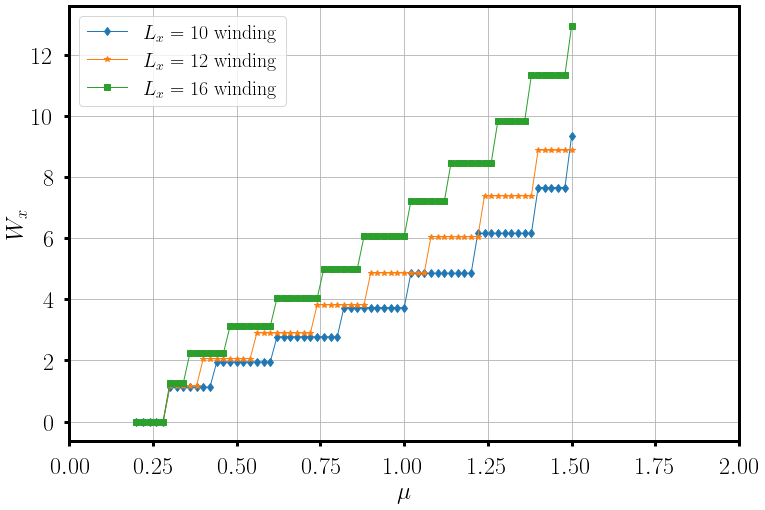

In [10]:
fig, ax1 = plt.subplots(1,figsize=(12,8))

#ax1.plot(L3mu, L3Wind, lw=1, marker='+', label= r'$L_x=3$ winding')
#ax1.plot(L4mu, L4Wind, lw=1, marker='o', label= r'$L_x=4$ winding')
#ax1.plot(L8mu, L8Wind, lw=1, marker='s', label= r'$L_x=8$ winding$')
ax1.plot(L10mu, L10Wind - L10Wind[0], lw=1, marker='d', label= r'$L_x=10$ winding')
ax1.plot(L12mu, L12Wind - L12Wind[0], lw=1, marker='*', label= r'$L_x=12$ winding')
ax1.plot(L16mu, L16Wind - L16Wind[0], lw=1, marker='s', label= r'$L_x=16$ winding')
#ax1.plot(L20mu, L20Wind, lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$W_x$')
ax1.set_xlim([0.0,2.0])
#ax1.set_ylim([6,21])
plt.grid()
ax1.legend(fontsize=20)

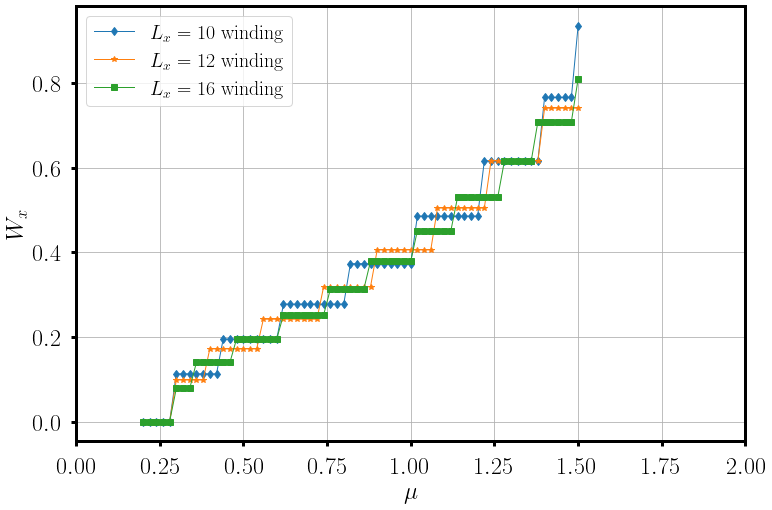

In [11]:
fig, ax1 = plt.subplots(1,figsize=(12,8))

#ax1.plot(L3mu, L3Wind, lw=1, marker='+', label= r'$L_x=3$ winding')
#ax1.plot(L4mu, L4Wind, lw=1, marker='o', label= r'$L_x=4$ winding')
#ax1.plot(L8mu, L8Wind, lw=1, marker='s', label= r'$L_x=8$ winding$')
ax1.plot(L10mu, (L10Wind - L10Wind[0])/10, lw=1, marker='d', label= r'$L_x=10$ winding')
ax1.plot(L12mu, (L12Wind - L12Wind[0])/12, lw=1, marker='*', label= r'$L_x=12$ winding')
ax1.plot(L16mu, (L16Wind - L16Wind[0])/16, lw=1, marker='s', label= r'$L_x=16$ winding')
#ax1.plot(L20mu, L20Wind, lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$W_x$')
ax1.set_xlim([0.0,2.0])
#ax1.set_ylim([6,21])
plt.grid()
ax1.legend(fontsize=20)

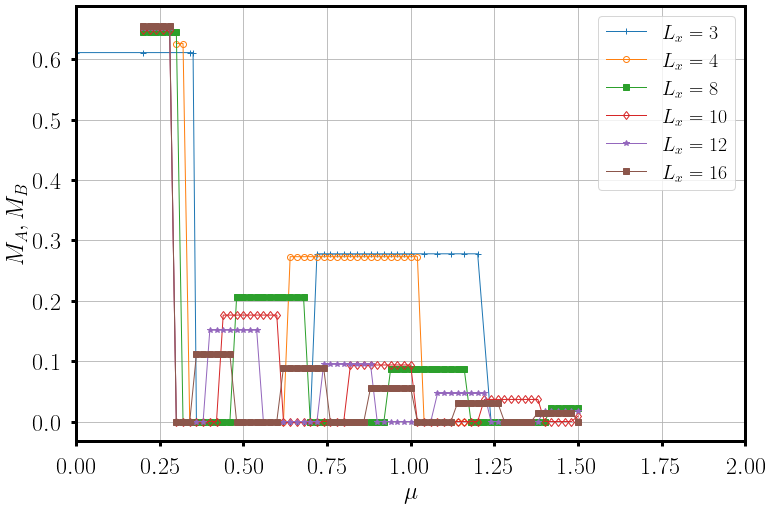

In [90]:
fig, ax1 = plt.subplots(1,figsize=(12,8))

ax1.plot(L3mu, np.abs(L3MA)/3, lw=1, marker='+', label= r'$L_x=3$')
ax1.plot(L4mu, np.abs(L4MA)/4, lw=1, marker='o', fillstyle='none', label= r'$L_x=4$')
ax1.plot(L8mu, np.abs(L8MA)/8, lw=1, marker='s', label= r'$L_x=8$')
ax1.plot(L10mu, np.abs(L10MA)/10, lw=1, marker='d',fillstyle='none', label= r'$L_x=10$')
ax1.plot(L12mu, np.abs(L12MA)/12, lw=1, marker='*', label= r'$L_x=12$')
ax1.plot(L16mu, np.abs(L16MA)/16, lw=1, marker='s', label= r'$L_x=16$')
#ax1.plot(L20mu, L20Wind, lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$M_A, M_B$')
ax1.set_xlim([0.0,2.0])
#ax1.set_ylim([6,21])
plt.grid()
ax1.legend(fontsize=20)

In [14]:
# L=3
jumps = np.diff(L3Wind); loc = jumps.nonzero(); 
diffWindingL3  = jumps[loc]; muCL3 = L3mu[loc]; L3eGS = L3energy[loc];
# L=4
jumps = np.diff(L4Wind); loc = jumps.nonzero(); 
diffWindingL4  = jumps[loc]; muCL4 = L4mu[loc]; L4eGS = L4energy[loc];
# L=8
jumps = np.diff(L8Wind); loc = jumps.nonzero(); 
diffWindingL8  = jumps[loc]; muCL8 = L8mu[loc]; L8eGS = L8energy[loc];
# L=10
jumps = np.diff(L10Wind); loc = jumps.nonzero(); 
diffWindingL10  = jumps[loc]; muCL10 = L10mu[loc]; L10eGS = L10energy[loc];
# L=12
jumps = np.diff(L12Wind); loc = jumps.nonzero(); 
diffWindingL12  = jumps[loc]; muCL12 = L12mu[loc]; L12eGS = L12energy[loc];
# L=16
jumps = np.diff(L16Wind); loc = jumps.nonzero(); 
diffWindingL16  = jumps[loc]; muCL16 = L16mu[loc]; L16eGS = L16energy[loc];

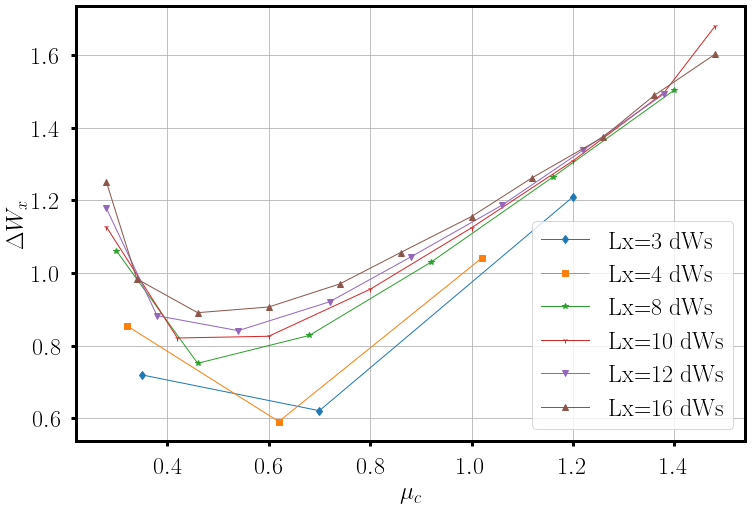

In [15]:
fig, ax1 = plt.subplots(1,figsize=(12,8))
#
plt.plot(muCL3, diffWindingL3, lw=1, marker='d', label= 'Lx=3 dWs')
plt.plot(muCL4, diffWindingL4, lw=1, marker='s', label= 'Lx=4 dWs')
plt.plot(muCL8, diffWindingL8, lw=1, marker='*', label= 'Lx=8 dWs')
plt.plot(muCL10, diffWindingL10, lw=1, marker='1', label= 'Lx=10 dWs')
plt.plot(muCL12, diffWindingL12, lw=1, marker='v', label= 'Lx=12 dWs')
plt.plot(muCL16, diffWindingL16, lw=1, marker='^', label= 'Lx=16 dWs')

ax1.set_xlabel(r'$\mu_c$')
ax1.set_ylabel(r'$\Delta W_x$')
plt.grid()
plt.legend()

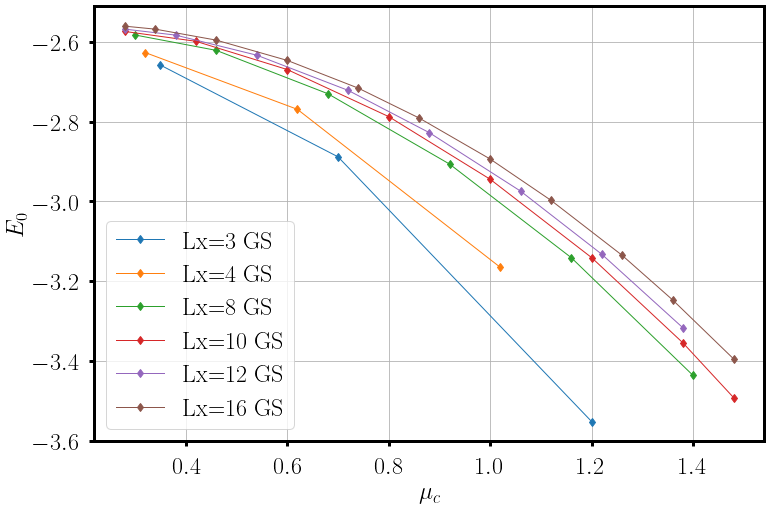

In [16]:
fig, ax1 = plt.subplots(1,figsize=(12,8))
#
plt.plot(muCL3, L3eGS/3, lw=1, marker='d', label= 'Lx=3 GS')
plt.plot(muCL4, L4eGS/4, lw=1, marker='d', label= 'Lx=4 GS')
plt.plot(muCL8, L8eGS/8, lw=1, marker='d', label= 'Lx=8 GS')
plt.plot(muCL10, L10eGS/10, lw=1, marker='d', label= 'Lx=10 GS')
plt.plot(muCL12, L12eGS/12, lw=1, marker='d', label= 'Lx=12 GS')
plt.plot(muCL16, L16eGS/16, lw=1, marker='d', label= 'Lx=16 GS')

ax1.set_xlabel(r'$\mu_c$')
ax1.set_ylabel(r'$E_0$')
plt.grid()
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


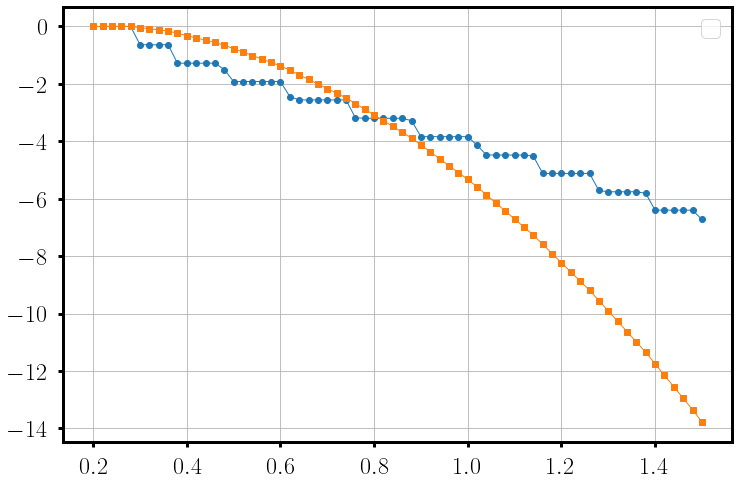

In [12]:
tol = 1.0e-10
dEL16dmu = np.diff(L16energy); 
#
#print(len(L16mu[1:]), len(dEL16dmu))
#
L16Ediff = L16energy - L16energy[0] #- np.multiply(L16mu , L16Wind - L16Wind[0])
#print(L16Ediff)
#
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(L16mu[1:], dEL16dmu*16, lw=1, marker='o')
ax1.plot(L16mu, L16Ediff, lw=1, marker='s')
plt.grid()
plt.legend()

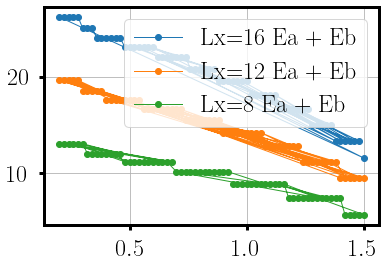

In [13]:
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB'], lw=1,marker='o', label= 'Lx=16 Ea + Eb' )    
plt.plot(df[(df['Lx']==12)]['mu_y'],  df[(df['Lx']==12)]['eA']+df[(df['Lx']==12)]['eB'], lw=1,marker='o', label= 'Lx=12 Ea + Eb' ) 
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['eA']+df[(df['Lx']==8)]['eB'], lw=1,marker='o', label= 'Lx=8 Ea + Eb' ) 
plt.grid()
plt.legend()

In [ ]:
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['Oflipp'], lw=1,marker='o', label = 'Oflipp')
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=1,marker='o', label = 'winding')
plt.grid()
plt.legend()
#np.diff(df[(df['Lx']==16)]['winding'])

#plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['Oflipp'], lw=0,marker='o')
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['winding'], lw=2,marker='o')

In [ ]:
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['Energy_GS']/16, lw=0,marker='o', label= 'Lx=16 Energy_GS')
plt.plot(df[(df['Lx']==12)]['mu_y'], df[(df['Lx']==12)]['Energy_GS']/12, lw=0,marker='o', label= 'Lx=12 Energy_GS')
plt.plot(df[(df['Lx']==8)]['mu_y'], df[(df['Lx']==8)]['Energy_GS']/8, lw=0,marker='o', label= 'Lx=8 Energy_GS')
plt.grid()
plt.legend()

In [ ]:
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB'], lw=1,marker='o', label= 'Lx=16 Ea + Eb' )    
plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=1,marker='o', label= 'Lx=16 Winding')

plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['eA']+df[(df['Lx']==16)]['eB']+df[(df['Lx']==16)]['winding'], lw=1,marker='o', label= 'Lx=16 Ea + Eb' )    


plt.grid()
plt.legend()


In [ ]:
differences_16= list(np.diff(df[(df['Lx']==16)]['winding']))
differences_16.append(0)

differences_12= list(np.diff(df[(df['Lx']==12)]['winding']))
differences_12.append(0)

differences_10= list(np.diff(df[(df['Lx']==10)]['winding']))
differences_10.append(0)

differences_8= list(np.diff(df[(df['Lx']==8)]['winding']))
differences_8.append(0)

#plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16/df[(df['Lx']==16)]['mu_y'], lw=0,marker='o', label = 'Differences in winding (Lx=16)')
#plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12/df[(df['Lx']==12)]['mu_y'], lw=0,marker='o', label = 'Differences in winding (Lx=10)')
#plt.plot(df[(df['Lx']==10)]['mu_y'], differences_10/df[(df['Lx']==10)]['mu_y'], lw=0,marker='o', label = 'Differences in winding (Lx=8)')

plt.plot(df[(df['Lx']==16)]['mu_y'], differences_16, lw=0,marker='o', label = 'Differences in winding (Lx=16)')
plt.plot(df[(df['Lx']==12)]['mu_y'], differences_12, lw=0,marker='o', label = 'Differences in winding (Lx=12)')
plt.plot(df[(df['Lx']==8)]['mu_y'], differences_8, lw=0,marker='o', label = 'Differences in winding (Lx=8)')



#plt.plot(df[(df['Lx']==16)]['mu_y'], df[(df['Lx']==16)]['winding'], lw=0,marker='o', label = 'winding')
plt.grid()
plt.legend()


In [ ]:
#df_new= pd.DataFrame(df[(df['Lx']==16)]['mu_y'],differences_16)
df[(df['Lx']==16)]['mu_y']

In [ ]:
differences_16 = np.array(differences_16)
mask = differences_16>0

In [ ]:
x = np.array(df[(df['Lx']==16)]['mu_y'])

In [ ]:
def funzione (x,a,b):
    return a + b *1/(x*x)
    
import scipy.optimize as optimization

In [ ]:
fit_result=optimization.curve_fit(funzione, x[mask], differences_16[mask]/x[mask])
a,b=fit_result[0][0],fit_result[0][1]

In [ ]:
plt.plot(x[mask], differences_16[mask]/x[mask],'o')
plt.plot(x[mask], funzione(x[mask],a,b),'o')   